# TP I : Conjecture de Syracuse

Ce TP vise à explorer la Conjecture de Syracude. **C'est un *TP à trous* ; il s'agira de compléter ces trous et d'y ajouter les tests qui vous sembleront utiles.**

    
Dans l'ensemble du déroulé du TP vous ferez bien attention à valider par un jeu de tests la validité des programmes écrits.



# Au travail!

In [3]:
from math import *
from matplotlib import pyplot as plt


## I- Introduction

Ce problème est apparu pour la première fois dans les années 30.

Puis, à nouveau, à l'université de Syracuse (New York) dans les années 50. Aucune solution n'étant trouvée, le problème s'est propagé aux autres universités américaines. Dans le contexte de la guerre froide, on évoque (comme une plaisanterie ?) une manœuvre russe pour paralyser la recherche américaine.

L'énoncé de ce problème est le suivant. On part d'un entier $n$ auquel on fait subir une transformation :

* si $n$ est pair, on le divise par deux ;
* si $n$ est impair, on le multiplie par $3$, et ajoute $1$.
Puis, on recommence sur le résultat.

Par exemple, en partant de n=10, on obtient :

$10 \quad 5 \quad 16 \quad 8 \quad 4 \quad 2 \quad 1 \quad 4 \quad 2 \quad 1$ etc.





#### LA CONJECTURE:

**quel que soit l'entier n, on finit par retomber sur 1.**

Cette conjecture n'a jamais été démontrée.

## II- Dichotomie

#### 1. création de la carte d'identité


Pour un entier $n$, nous appellerons sa "carte d'identité", une liste qui contiendra
* l'entier $n$
* sa **trajectoire** (la liste des valeurs prises par la suite jusqu'à ce qu'on trouve la valeur 1)
* sa **durée de vol** (le nombre d'entiers avant d'arriver à la valeur 1)
* son **altitude maximale** (le plus grand entier rencontré)

Créer une fonction carte_ident qui prend en entrée un entier $n$ et qui renvoie en sortie la carte d'identité de $n$.

Par exemple en reprenant l'exemple ci-dessus avec $n=10$, on obtiendrait:

carte_ident(10)=[10,[10,5,16,8,4,2,1],6,16]


In [4]:
def carte_ident(n):
    """
    Description: 
    Parameters:
    n: un entier dont on cherche la carte d'identité
    
    Output
    carte d'identité de n sous forme de liste
    """
    # Création d'une liste pour la carte d'identité
    id = [n]
    # Nombre de transformation fait avant d'arriver à 1
    duree = 0
    # Récupère toutes les transformations faites et le 1
    trajectoire = []
    # Variable afin de ne pas toucher le n durant la boucle
    value = n
    # Boucle permettant de faire la trajectoire
    while value != 1:
        trajectoire.append(value)

        # Si value est paire divise par deux
        if value%2 == 0:
            value = value/2
        # Sinon multiplie par 3 et ajoute 1
        else:
            value = value*3+1
        duree += 1 
    # Ajoute avlue qui est égale à 1 à la fin de la trajectoire
    trajectoire.append(value)
    alt_max = max(trajectoire)

    # Ajoute la trajectoire, la durée et l'altitude max
    id.append(trajectoire)
    id.append(duree)
    id.append(alt_max)

    return id

In [5]:
print(carte_ident(10))

[10, [10, 5.0, 16.0, 8.0, 4.0, 2.0, 1.0], 6, 16.0]


#### 2. Affichage d'une carte d'identité

Proposer une manière de visualiser la carte d'identité d'un entier $n$.

Dans un graphique mathplotlib, vous afficherez l'ensemble des éléments de la carte d'identité d'un entier $n$ donné.


In [27]:
def affiche_carte(n):
    """
    Description: 
    Parameters:
    n: un entier dont on cherche la carte d'identité
    
    Output
    Pas de sortie demandée, l'affichage sera effectué au sein de la fonction
    """
    # Récupère la liste de la carte d'identité générée
    carte_id = carte_ident(n)

    # Définie l'area du graphique
    plt.figure(figsize=(10, 6))

    # Dessine la trajectoire
    plt.plot(carte_id[1], marker='o')

    # Ajoute une grille
    plt.grid()

    # Rajoute un titre et des informations
    plt.title("Carte d'identité de " + str(n))
    
    # figtext s'adapte à la page et non pas aux points
    plt.figtext(.92, .7, 'Altitude maximum : ' + str(int(carte_id[-1])))
    plt.figtext(.92, .65, 'Durée : ' + str(int(carte_id[-2])))
    plt.figtext(.2, .8, "n = " + str(n))
    plt.xlabel('Transformation')
    plt.show()

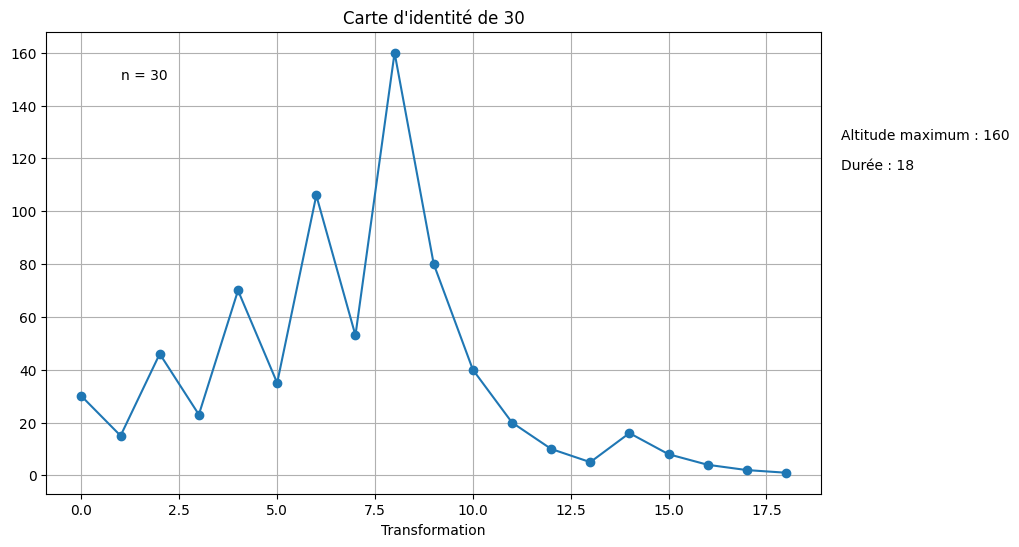

In [28]:
affiche_carte(30)

#### 3. Génération des cartes d'identité pour une suite d'entiers $n$

Créer une fonction qui génère les cartes d'identité de tous les entiers compris entre $1 et $n$ et qui renvoie une liste comprenant toutes ces cartes d'identité.


In [16]:
def genere_cartes(n):
    """
    Description: 
    Parameters:
    n: un entier qui donne le nombre de cartes à générer
    
    Output
    une liste comprenant toutes les cartes d'identité des entiers compris entre $1$ et $n$
    """

    # Liste qui récupère toutes les cartes d'identités
    all_cartes = []
    for number in range(1, n+1):
        all_cartes.append(carte_ident(number))
    return  all_cartes

In [17]:
print(genere_cartes(10))

[[1, [1], 0, 1], [2, [2, 1.0], 1, 2], [3, [3, 10, 5.0, 16.0, 8.0, 4.0, 2.0, 1.0], 7, 16.0], [4, [4, 2.0, 1.0], 2, 4], [5, [5, 16, 8.0, 4.0, 2.0, 1.0], 5, 16], [6, [6, 3.0, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0, 1.0], 8, 16.0], [7, [7, 22, 11.0, 34.0, 17.0, 52.0, 26.0, 13.0, 40.0, 20.0, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0, 1.0], 16, 52.0], [8, [8, 4.0, 2.0, 1.0], 3, 8], [9, [9, 28, 14.0, 7.0, 22.0, 11.0, 34.0, 17.0, 52.0, 26.0, 13.0, 40.0, 20.0, 10.0, 5.0, 16.0, 8.0, 4.0, 2.0, 1.0], 19, 52.0], [10, [10, 5.0, 16.0, 8.0, 4.0, 2.0, 1.0], 6, 16.0]]


#### 4. Trouver les grands vols

Créer une fonction qui affiche les cartes d'identité de tous entiers inférieurs à un nombre $n$ donné dont la durée de vol excède une valeur $D$ donnée.

In [10]:
def grands_vols(n,D):
    """
    Description: 
    Parameters:
    n: un entier qui donne le nombre de cartes à générer
    D: un entier qui détermine la durée de vol à partir de laquelle on affiche la carte d'identité de l'entier testé
    
    Output
    Pas de sortie demandée, l'affichage se fera pendant l'exécution de la fonction.
    """
    # Génère les cartes de 1 à n
    cartes = genere_cartes(n)


    for carte in cartes:
        # Si la durée de vol est  supérieur à D, l'affiche
        if carte[-2] >= D:
            affiche_carte(carte[0])

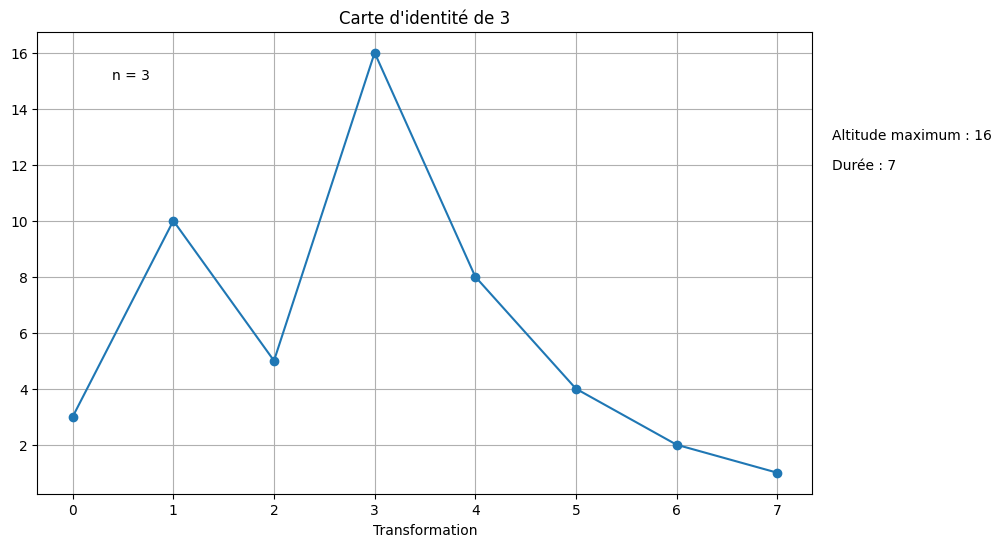

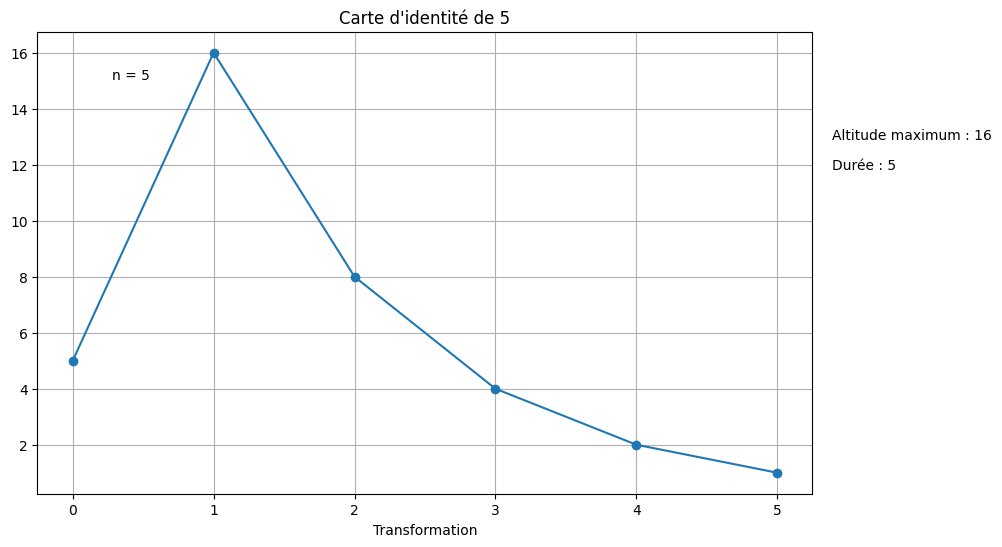

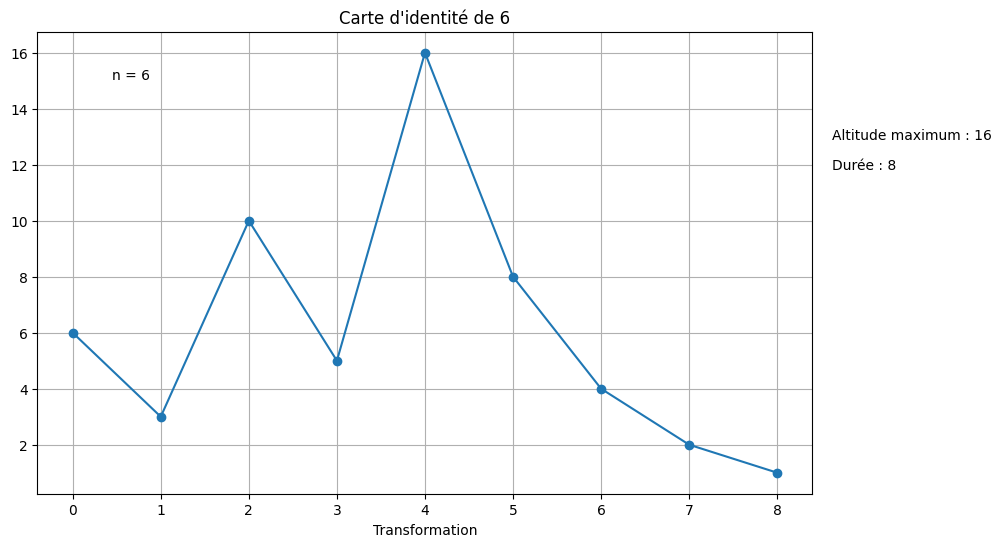

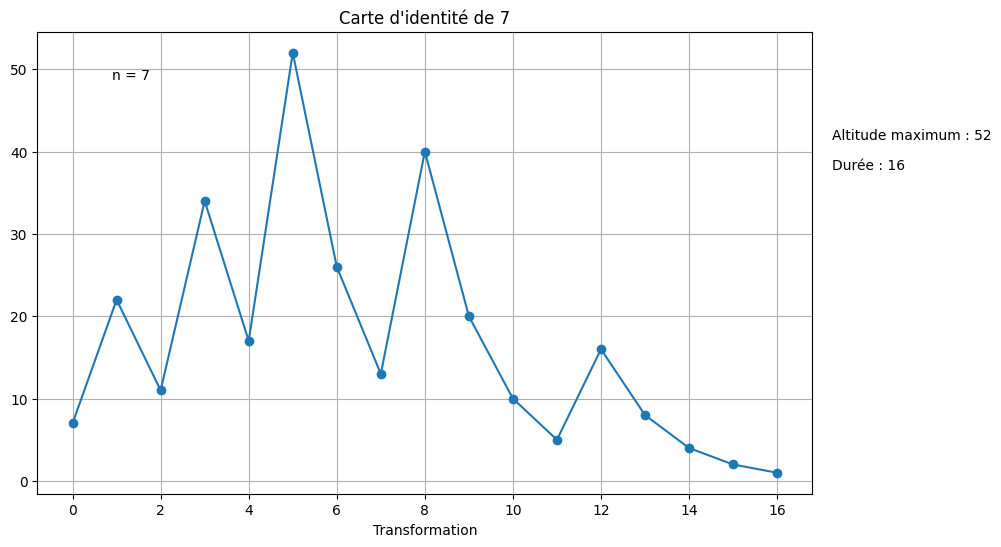

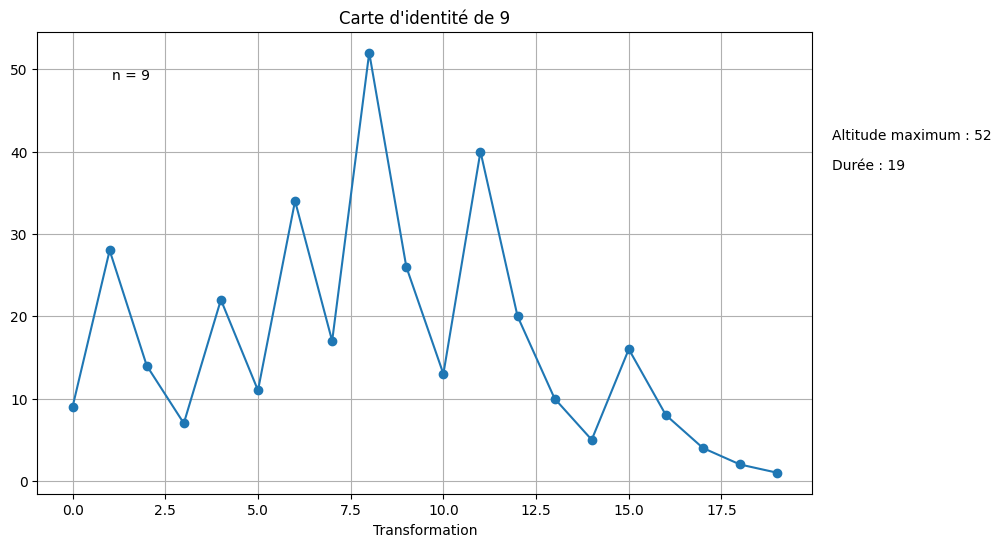

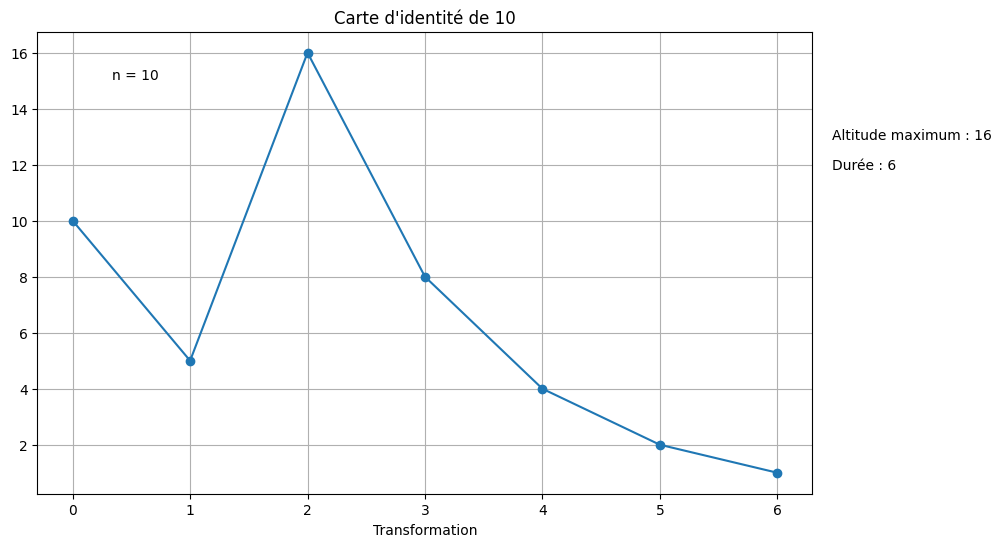

In [11]:
grands_vols(10, 5)

#### 5. Trouver les vols de haute altitude

Créer une fonction qui affiche les cartes d'identité de tous entiers inférieurs à un nombre $n$ donné dont l'altitude maximale excède une valeur $H$ donnée.

In [18]:
def haute_alt(n,H):
    """
    Description: 
    Parameters:
    n: un entier qui donne le nombre de cartes à générer
    H: un entier qui détermine l'altitude maximale à partir de laquelle on affiche la carte d'identité de l'entier testé

    
    Output
    Pas de sortie demandée, l'affichage se fera pendant l'exécution de la fonction.
    """
    # n-1 car on veut uniquement les entiers inférieurs
    cartes = genere_cartes(n-1)
    for carte in cartes:
        if carte[-1] >= H:
            affiche_carte(carte[0])
    

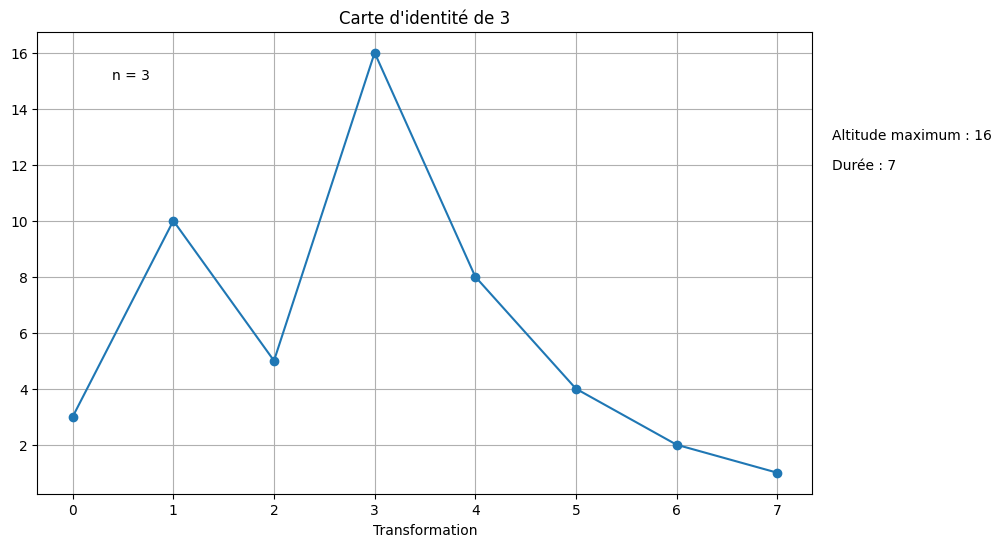

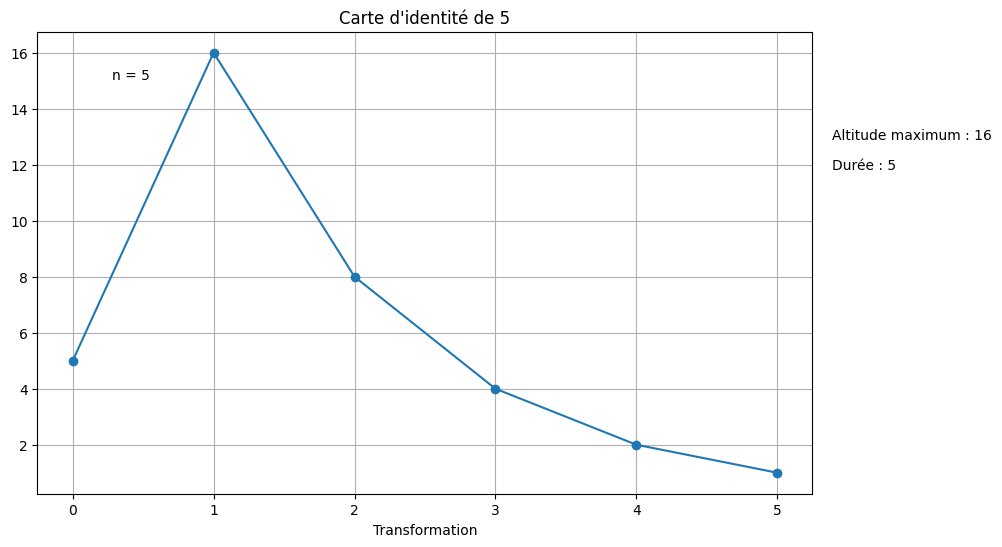

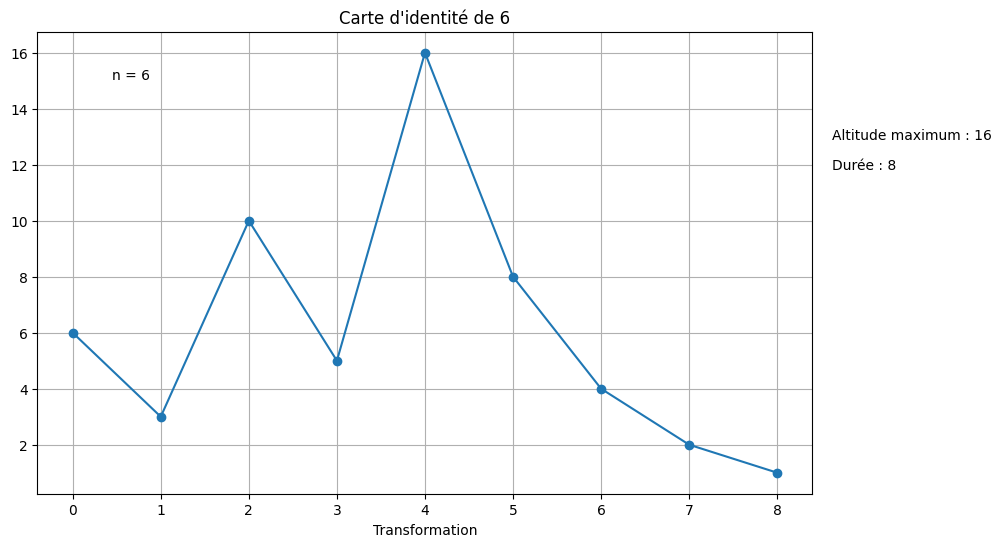

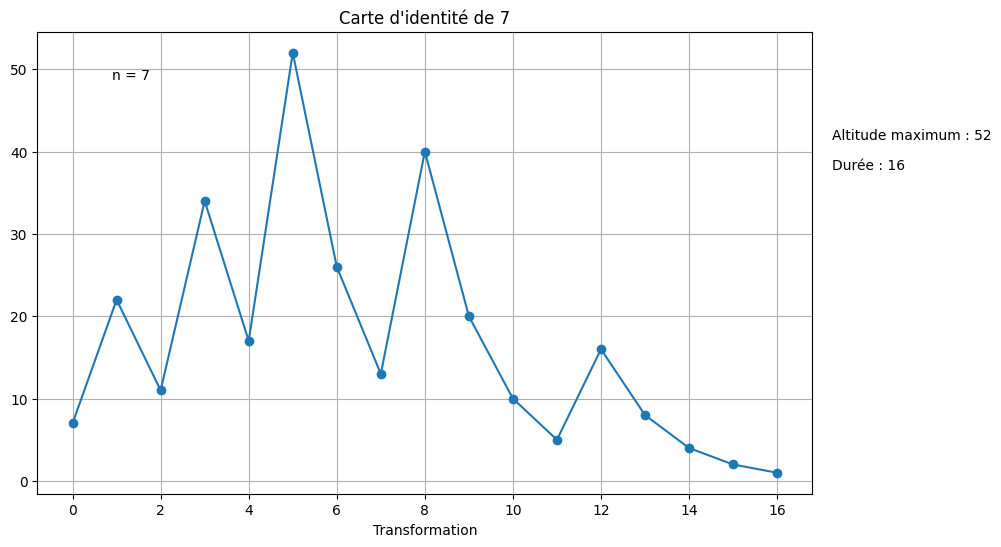

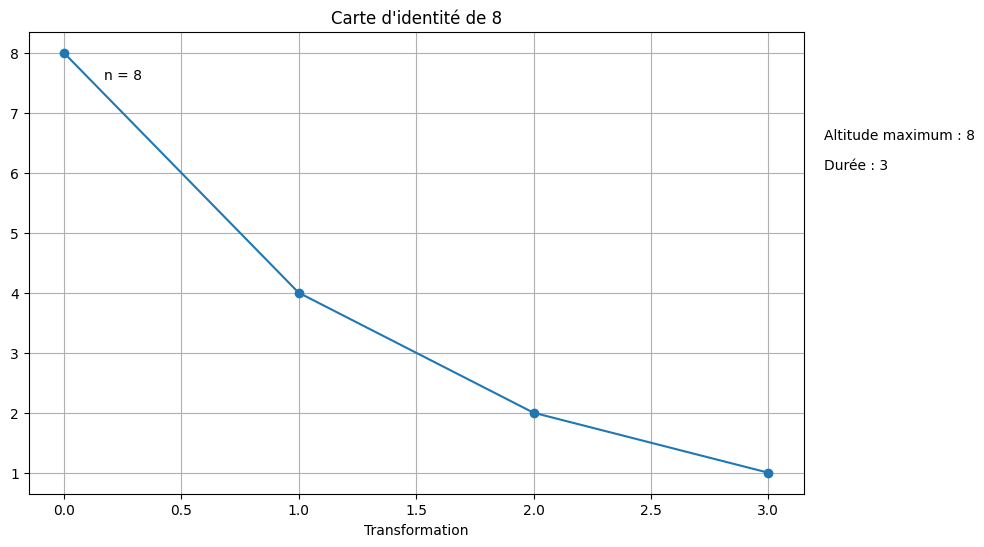

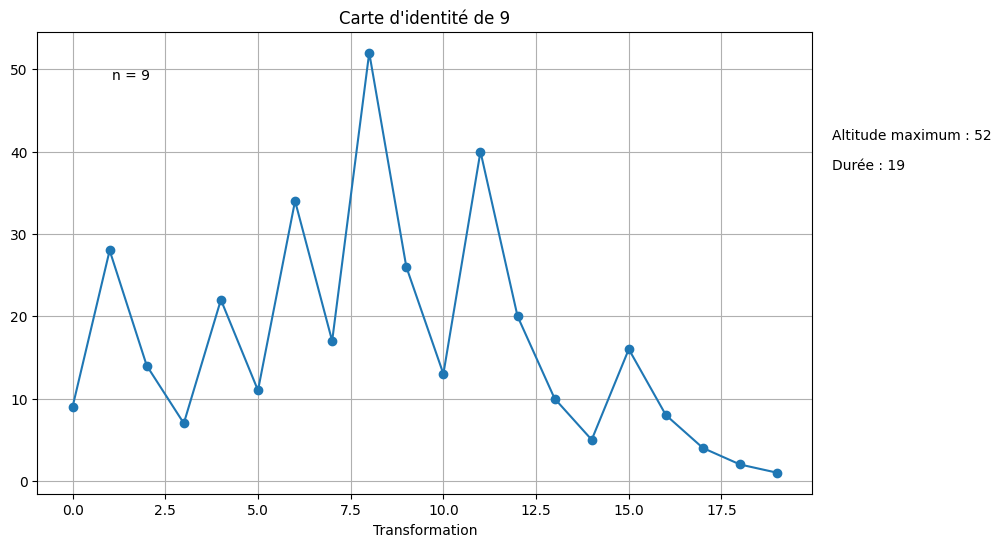

In [20]:
haute_alt(10, 5)